## CNN 

In [4]:
import numpy as np 
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten 
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization, AveragePooling2D
from keras.optimizers import Adam
from keras import regularizers
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import os
import pickle
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, precision_score, f1_score
import Functions as func
import var
import Viz


In [5]:
### best is model weights 2

In [6]:
def get_conv_model_normal(dim):
    inp_shape = dim
    act = 'relu'
    drop = .25
    kernal_reg = regularizers.l1(.001)
    optimizer = Adam(lr = .0001)
    
    model = Sequential() 
    
    model.add(Conv2D(64, kernel_size=(3,3),activation=act, input_shape = inp_shape, 
                     kernel_regularizer = kernal_reg,
                     kernel_initializer = 'he_uniform',  padding = 'same', name = 'Input_Layer'))
#     model.add(Dense(64, activation = 'relu'))
    model.add(MaxPooling2D(pool_size=(2, 2),  strides = (3,3)))
    
    
    model.add(Conv2D(64, (3, 3), activation=act, kernel_regularizer = kernal_reg, 
                     kernel_initializer = 'he_uniform',padding = 'same'))
#     model.add(Dense(64, activation = 'relu'))
    model.add(MaxPooling2D(pool_size=(2, 2), strides = (3,3)))
    

    
    model.add(Conv2D(128, (3, 3), activation=act, kernel_regularizer = kernal_reg, 
                     kernel_initializer = 'he_uniform',padding = 'same'))
    model.add(Conv2D(128, (3, 3), activation=act, kernel_regularizer = kernal_reg, 
                     kernel_initializer = 'he_uniform',padding = 'same'))
    model.add(MaxPooling2D(pool_size=(2, 2), strides = (3,3)))

    
    model.add(Flatten())

    
    model.add(Dense(128, activation='relu'))
    model.add(Dense(64, activation='relu'))
    model.add(Dense(32, activation='relu'))

    model.add(Dropout(drop))

    model.add(Dense(3, activation='softmax', name = 'Output_Layer'))
    
    model.compile(loss = 'categorical_crossentropy', optimizer = optimizer, metrics = ['accuracy'])
    return model 


In [7]:
edge = True
x_train, x_test, y_train, y_test = func.get_samples('normal', edge = edge)


In [8]:
print(x_train.shape, x_test.shape)
print(y_train.shape, y_test.shape)

(6062, 150, 150, 1) (674, 150, 150, 1)
(6062, 3) (674, 3)


In [9]:
import cv2 

cv2.imshow('test', x_train[1000])
cv2.waitKey(0)
cv2.destroyAllWindows()

In [ ]:
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau
from keras.preprocessing.image import ImageDataGenerator


augment = False 
early_stopping = EarlyStopping(monitor='val_loss', verbose = 1, patience=10, min_delta = .00075)
model_checkpoint = ModelCheckpoint('../models/CNN-ModelCheckpointWeights4.h5', verbose = 1, save_best_only=True,
                                  monitor = 'val_loss')
lr_plat = ReduceLROnPlateau(patience = 3, mode = 'min')
epochs = 100
batch_size = 32

if edge == True: 
    dim = (x_train.shape[1], x_train.shape[2], 1)
else: 
    dim = (x_train.shape[1], x_train.shape[2], 3)
    
normal_model = get_conv_model_normal(dim =dim)

if augment: 
    augmentation =ImageDataGenerator(rotation_range = 20, width_shift_range = .2, height_shift_range = .2, 
                                                           horizontal_flip = True, shear_range = .15, 
                                     fill_mode = 'nearest', zoom_range = .15)
    augmentation.fit(x_train)
    normal_history = normal_model.fit_generator(augmentation.flow(x_train, y_train, batch_size = batch_size),
                epochs = epochs, 
         callbacks = [early_stopping, model_checkpoint, lr_plat], validation_data = (x_test, y_test), verbose= 1)
else: 
    
    normal_history = normal_model.fit(x_train, y_train, batch_size = batch_size,
                epochs = epochs, 
         callbacks = [early_stopping, model_checkpoint, lr_plat], validation_data = (x_test, y_test), verbose= 1)


INFO:plaidml:Opening device "opencl_amd_ellesmere.0"


Train on 6062 samples, validate on 674 samples
Epoch 1/100
6062/6062 [==============================] - 43s 7ms/step - loss: 21.4443 - acc: 0.6048 - val_loss: 12.6146 - val_acc: 0.7700

Epoch 00001: val_loss improved from inf to 12.61457, saving model to ../models/CNN-ModelCheckpointWeights4.h5
Epoch 2/100
6062/6062 [==============================] - 18s 3ms/step - loss: 12.8724 - acc: 0.7311 - val_loss: 12.1014 - val_acc: 0.7997

Epoch 00002: val_loss improved from 12.61457 to 12.10138, saving model to ../models/CNN-ModelCheckpointWeights4.h5
Epoch 3/100
6062/6062 [==============================] - 18s 3ms/step - loss: 12.0845 - acc: 0.7629 - val_loss: 11.7777 - val_acc: 0.7685

Epoch 00003: val_loss improved from 12.10138 to 11.77774, saving model to ../models/CNN-ModelCheckpointWeights4.h5
Epoch 4/100
6062/6062 [==============================] - 18s 3ms/step - loss: 11.6908 - acc: 0.7837 - val_loss: 11.5951 - val_acc: 0.7656

Epoch 00004: val_loss improved from 11.77774 to 11.59506,

6062/6062 [==============================] - 19s 3ms/step - loss: 6.9626 - acc: 0.9749 - val_loss: 7.3699 - val_acc: 0.8086

Epoch 00033: val_loss improved from 7.74263 to 7.36985, saving model to ../models/CNN-ModelCheckpointWeights4.h5
Epoch 34/100
6062/6062 [==============================] - 19s 3ms/step - loss: 6.7536 - acc: 0.9774 - val_loss: 7.2845 - val_acc: 0.8309

Epoch 00034: val_loss improved from 7.36985 to 7.28448, saving model to ../models/CNN-ModelCheckpointWeights4.h5
Epoch 35/100
6062/6062 [==============================] - 19s 3ms/step - loss: 6.5369 - acc: 0.9825 - val_loss: 7.0341 - val_acc: 0.8116

Epoch 00035: val_loss improved from 7.28448 to 7.03411, saving model to ../models/CNN-ModelCheckpointWeights4.h5
Epoch 36/100
6062/6062 [==============================] - 18s 3ms/step - loss: 6.3117 - acc: 0.9881 - val_loss: 6.9396 - val_acc: 0.8249

Epoch 00036: val_loss improved from 7.03411 to 6.93963, saving model to ../models/CNN-ModelCheckpointWeights4.h5
Epoch 37/

In [ ]:
# print(normal_model.summary())

### Loss & Accuracy

In [ ]:
Viz.plot_loss_accuracy(normal_history)

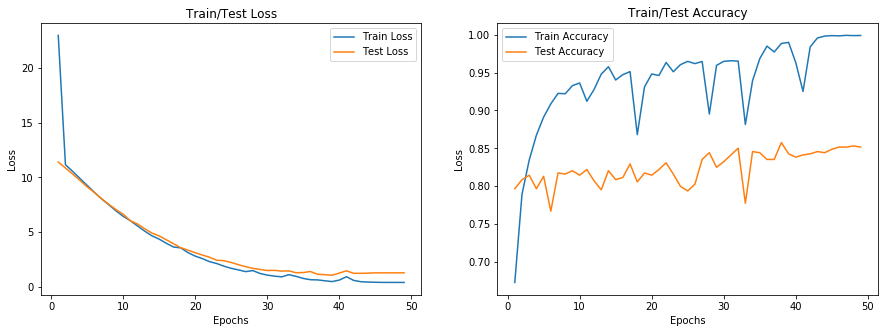

In [8]:
Viz.plot_loss_accuracy(normal_history)

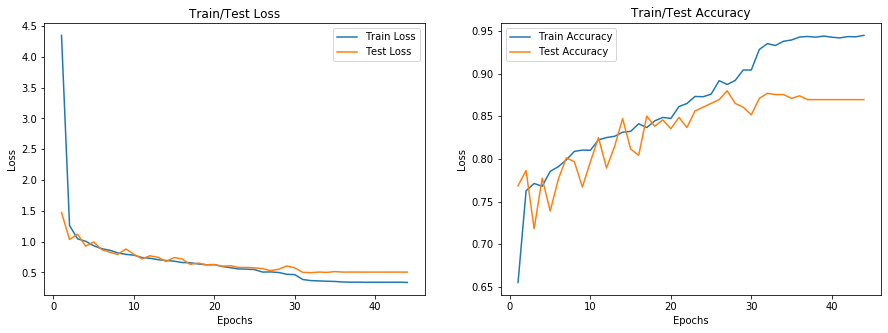

In [9]:
Viz.plot_loss_accuracy(normal_history)

### AUC and ROC Curves

In [ ]:
if edge == True: 
    dim = (x_train.shape[1], x_train.shape[2], 1)
else: 
    dim = (x_train.shape[1], x_train.shape[2], 3)
    
normal_model = get_conv_model_normal(dim)
normal_model.load_weights('../models/CNN-ModelCheckpointWeights4.h5') #load the best weights before overfitting
 


    
Viz.plot_roc_auc(normal_model, x_test, y_test)

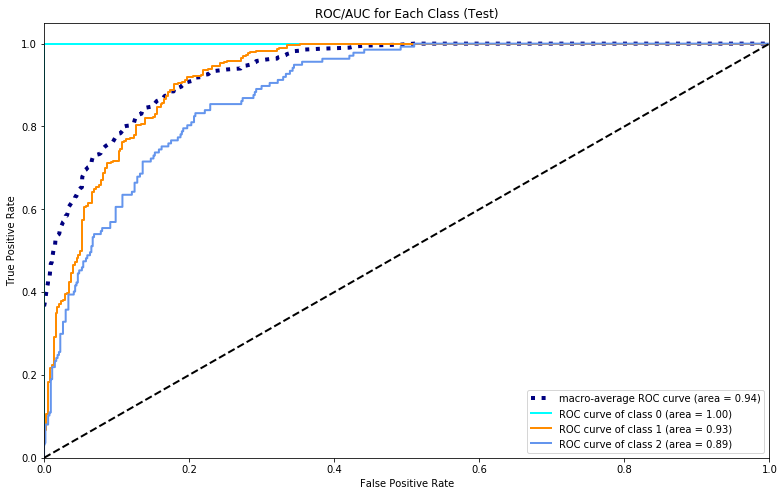

F1 Scores Test
~~~~~~~~~~~~~~~~~~~~~~
No Weapon: 0.997946611909651
HandGun: 0.8270181219110379
Rifle: 0.5826771653543307


In [9]:
if edge == True: 
    dim = (x_train.shape[1], x_train.shape[2], 1)
else: 
    dim = (x_train.shape[1], x_train.shape[2], 3)
    
normal_model = get_conv_model_normal(dim)
normal_model.load_weights('../models/CNN-ModelCheckpointWeights2.h5') #load the best weights before overfitting
 


    
Viz.plot_roc_auc(normal_model, x_test, y_test)

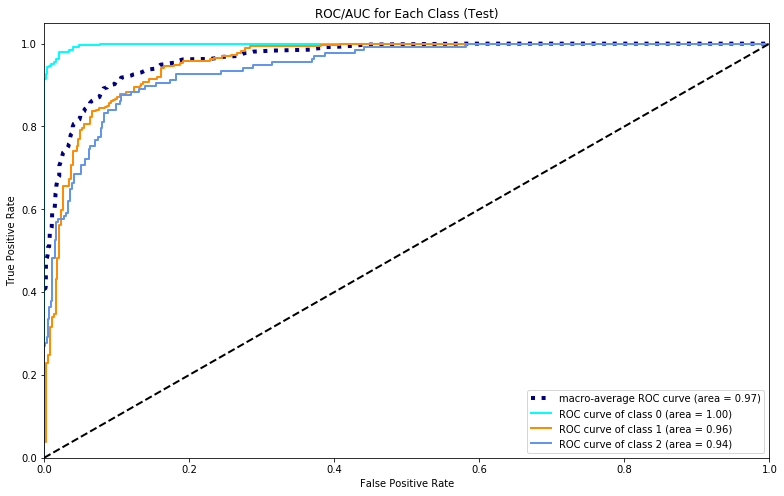

F1 Scores Test
~~~~~~~~~~~~~~~~~~~~~~
No Weapon: 0.9650924024640657
HandGun: 0.8682432432432433
Rifle: 0.7360594795539033


In [10]:
if edge == True: 
    dim = (x_train.shape[1], x_train.shape[2], 1)
else: 
    dim = (x_train.shape[1], x_train.shape[2], 3)
    
normal_model = get_conv_model_normal(dim)
normal_model.load_weights('../models/CNN-ModelCheckpointWeights1.h5') #load the best weights before overfitting
 


    
Viz.plot_roc_auc(normal_model, x_test, y_test)

### Confusion Matrix

In [ ]:
if edge == True: 
    dim = (x_train.shape[1], x_train.shape[2], 1)
else: 
    dim = (x_train.shape[1], x_train.shape[2], 3)
        
normal_model = get_conv_model_normal(dim)
normal_model.load_weights('../models/CNN-ModelCheckpointWeights4.h5') #load the best weights before overfitting





y_test_prob = [np.argmax(i) for i in normal_model.predict(x_test)]
y_test_labels = [np.argmax(
    i) for i in y_test]
test_cnf = confusion_matrix(y_test_labels, y_test_prob)

y_train_prob = [np.argmax(i) for i in normal_model.predict(x_train)]
y_train_labels = [np.argmax(i) for i in y_train]
train_cnf = confusion_matrix(y_train_labels, y_train_prob)

Viz.plot_model_cm(test_cnf, train_cnf, classes = ['No Weapon', 'Handgun', 'Rifle'])


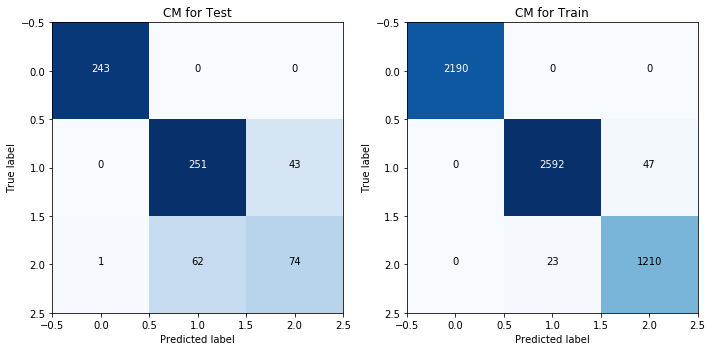

In [10]:
if edge == True: 
    dim = (x_train.shape[1], x_train.shape[2], 1)
else: 
    dim = (x_train.shape[1], x_train.shape[2], 3)
        
normal_model = get_conv_model_normal(dim)
normal_model.load_weights('../models/CNN-ModelCheckpointWeights2.h5') #load the best weights before overfitting





y_test_prob = [np.argmax(i) for i in normal_model.predict(x_test)]
y_test_labels = [np.argmax(
    i) for i in y_test]
test_cnf = confusion_matrix(y_test_labels, y_test_prob)

y_train_prob = [np.argmax(i) for i in normal_model.predict(x_train)]
y_train_labels = [np.argmax(i) for i in y_train]
train_cnf = confusion_matrix(y_train_labels, y_train_prob)

Viz.plot_model_cm(test_cnf, train_cnf, classes = ['No Weapon', 'Handgun', 'Rifle'])


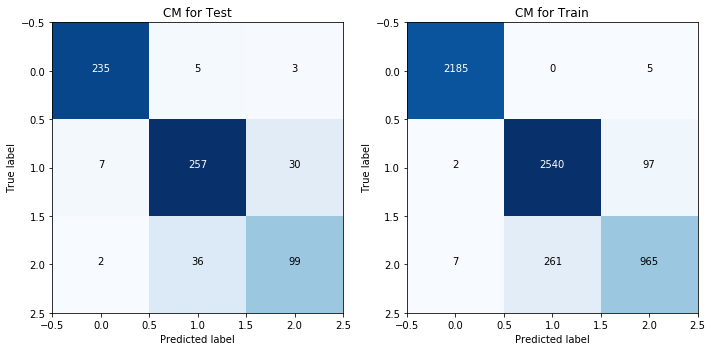

In [19]:
if edge == True: 
    dim = (x_train.shape[1], x_train.shape[2], 1)
else: 
    dim = (x_train.shape[1], x_train.shape[2], 3)
        
normal_model = get_conv_model_normal(dim)
normal_model.load_weights('../models/CNN-ModelCheckpointWeights1.h5') #load the best weights before overfitting





y_test_prob = [np.argmax(i) for i in normal_model.predict(x_test)]
y_test_labels = [np.argmax(
    i) for i in y_test]
test_cnf = confusion_matrix(y_test_labels, y_test_prob)

y_train_prob = [np.argmax(i) for i in normal_model.predict(x_train)]
y_train_labels = [np.argmax(i) for i in y_train]
train_cnf = confusion_matrix(y_train_labels, y_train_prob)

Viz.plot_model_cm(test_cnf, train_cnf, classes = ['No Weapon', 'Handgun', 'Rifle'])


In [ ]:
assert False

#### Test on Google Data


In [5]:
import cv2
from skimage.segmentation import mark_boundaries

In [30]:
#WITH MAX SUPPRESION


#     clone = img.copy() 
#     clone2 = img.copy()
#     for idx, pred in enumerate(predictions): 
#         if pred[1] == 1 or pred[2] == 1: 
#             startx, starty, endx, endy = locations[idx]
#             cv2.rectangle(clone, (startx, starty), (endx, endy), (0,0,255), 2)
            
#     no_sum = predictions[:,0].sum()
#     pistol_sum = predictions[:,1].sum()
#     rifle_sum = predictions[:,2].sum() 
#     sum_array = np.array([no_sum, pistol_sum, rifle_sum])
#     print(sum_array)
#     clone = img.copy()
#     clone2 = img.copy()
#     print(np.argmax(sum_array))
#     cat_predictions = predictions[:,np.argmax(sum_array)]
#     pred_max_idx = np.argmax(cat_predictions)
#     pred_max = cat_predictions[pred_max_idx]
    
#     pred_max_window = locations[pred_max_idx]
#     startx, starty, endx, endy = pred_max_window


#     cv2.rectangle(clone, (startx, starty), (endx, endy),  (0,0,255),2)
#     cat = category_dict[np.argmax(sum_array)]
#     text = f'{cat}'
#     cv2.putText(clone, text, (startx, starty), cv2.FONT_HERSHEY_SIMPLEX, .45, (0,0,255),2)

def auto_canny(image, sigma=0.33):
    # compute the median of the single channel pixel intensities
    v = np.median(image)
    # apply automatic Canny edge detection using the computed median
    lower = int(max(0, (1.0 - sigma) * v))
    upper = int(min(255, (1.0 + sigma) * v))
    edged = cv2.Canny(image, lower, upper)
    return edged

def get_edged(img, dim): 
    blurred = cv2.GaussianBlur(img, (3,3), 0)
    wide = cv2.Canny(blurred, 10,200)
    tight = cv2.Canny(blurred, 225, 250)
    auto = auto_canny(blurred)
    wide = cv2.resize(wide, dim, interpolation = cv2.INTER_CUBIC)
    tight = cv2.resize(tight, dim, interpolation = cv2.INTER_CUBIC)
    auto = cv2.resize(auto, dim, interpolation = cv2.INTER_CUBIC)
    return wide


def get_img_prediction_bounding_box(path, model, dim, edge = False):
    img = func.get_image_value(path, dim, edge = edge)

    if edge == True:
        img = img.reshape(1, img.shape[0], img.shape[1], 1)
    else: 
        img = img.reshape(1, img.shape[0], img.shape[1], 3)
    pred = model.predict(img)[0]
    
    category_dict = {0: 'No Weapon', 1: 'Handgun', 2: 'Rifle'}
    cat_index = np.argmax(pred)
    cat = category_dict[cat_index]
    
    print(f'{path}\t\t{cat_index}||{cat}\t\t{pred.max()}\t\t{pred}')
    
    img = cv2.imread(path)
    ss = cv2.ximgproc.segmentation.createSelectiveSearchSegmentation()
    ss.setBaseImage(img)
    ss.switchToSelectiveSearchFast()
    rects = ss.process() 

    windows = []
    locations = []
    for x, y, w,h in rects: 
        startx = x 
        starty = y 
        endx = x+w 
        endy = y+h 
        roi = img[starty:endy, startx:endx]
        if edge == True:
            roi = get_edged(roi, dim = dim)
        roi = cv2.resize(roi, dsize =dim, interpolation = cv2.INTER_CUBIC)
        windows.append(roi)
        locations.append((startx, starty, endx, endy))

    windows = np.array(windows)
    print(windows.shape)
    if edge == True:
        windows = windows.reshape(windows.shape[0], windows.shape[1], windows.shape[2], 1)
    else: 
        windows = windows.reshape(windows.shape[0], windows.shape[1], windows.shape[2], 3)
    windows = np.array(windows)
    locations = np.array(locations)
    predictions = model.predict(windows)
    
    pick = non_max_suppression(locations, probs = None)
    print(pick)
    clone = img.copy() 
    clone2 = img.copy()
    for idx in pick: 
        startx, startx, endx, endy = locations[idx]
        cv2.rectangle(clone, (startx, starty), (endx, endy), (0,0,255), 2)
        
    
#GOES HERE 
    cv2.imshow(f'Test', np.hstack([clone, clone2]))
    cv2.waitKey(0)
    ss.clear()


    return predictions



def non_max_suppression(boxes, probs, overlapThresh=0.3):
    # if there are no boxes, return an empty list
    if len(boxes) == 0:
        return []

    # if the bounding boxes are integers, convert them to floats -- this
    # is important since we'll be doing a bunch of divisions
    if boxes.dtype.kind == "i":
        boxes = boxes.astype("float")

    # initialize the list of picked indexes
    pick = []

    # grab the coordinates of the bounding boxes
    x1 = boxes[:, 0]
    y1 = boxes[:, 1]
    x2 = boxes[:, 2]
    y2 = boxes[:, 3]

    # compute the area of the bounding boxes and grab the indexes to sort
    # (in the case that no probabilities are provided, simply sort on the
    # bottom-left y-coordinate)
    area = (x2 - x1 + 1) * (y2 - y1 + 1)
    idxs = y2

    # if probabilities are provided, sort on them instead
    if probs is not None:
        idxs = probs

    # sort the indexes
    idxs = np.argsort(idxs)
    # keep looping while some indexes still remain in the indexes list
    while len(idxs) > 0:
        # grab the last index in the indexes list and add the index value
        # to the list of picked indexes
        last = len(idxs) - 1
        i = idxs[last]
        pick.append(i)

        # find the largest (x, y) coordinates for the start of the bounding
        # box and the smallest (x, y) coordinates for the end of the bounding
        # box
        xx1 = np.maximum(x1[i], x1[idxs[:last]])
        yy1 = np.maximum(y1[i], y1[idxs[:last]])
        xx2 = np.minimum(x2[i], x2[idxs[:last]])
        yy2 = np.minimum(y2[i], y2[idxs[:last]])

        # compute the width and height of the bounding box
        w = np.maximum(0, xx2 - xx1 + 1)
        h = np.maximum(0, yy2 - yy1 + 1)

        # compute the ratio of overlap
        overlap = (w * h) / area[idxs[:last]]

        # delete all indexes from the index list that have overlap greater
        # than the provided overlap threshold
        idxs = np.delete(idxs, np.concatenate(([last],
            np.where(overlap > overlapThresh)[0])))

    # return the indexes of only the bounding boxes to keep
    return pick


base_path = '../Tests/Photos'
edge = True
if edge == True: 
    dim = (x_train.shape[1], x_train.shape[2], 1)
else: 
    dim = (x_train.shape[1], x_train.shape[2], 3)
    
normal_model = get_conv_model_normal(dim)
normal_model.load_weights('../models/CNN-ModelCheckpointWeights2.h5')

for file in os.listdir(base_path):
    img = get_img_prediction_bounding_box(f'{base_path}/{file}', normal_model, var.norm_dimension, edge = edge)
    
    

../Tests/Photos/AR.jpg		0||No Weapon		1.0		[1.000000e+00 9.124267e-27 6.584892e-22]
(622, 150, 150)
[56, 531, 380, 349, 534, 208]
../Tests/Photos/NonGun.jpeg		0||No Weapon		1.0		[1.0000000e+00 2.2783471e-17 1.3233782e-14]
(3544, 150, 150)
[3543, 3208, 2663, 3160, 222, 2388, 2387, 3254, 1710, 1821, 1354, 3109, 105, 822, 1736]
../Tests/Photos/NonGun2.jpg		0||No Weapon		0.9999990463256836		[9.9999905e-01 4.6709619e-08 9.2401808e-07]
(288, 150, 150)
[287, 112]
../Tests/Photos/Pistol.jpg		0||No Weapon		0.999998927116394		[9.9999893e-01 1.8402537e-07 7.7603426e-07]
(3497, 150, 150)
[3496, 1401, 2475, 2730, 3114, 239, 131, 2832, 2409, 485, 3307, 1901, 2396, 446, 2133, 1758, 407, 853]
../Tests/Photos/Pistol2.jpg		0||No Weapon		1.0		[1.0000000e+00 0.0000000e+00 3.0975404e-35]
(10295, 150, 150)
[10294, 8646, 10252, 7522, 2857, 6578, 5505, 5433, 7220, 5510, 4262]
../Tests/Photos/Pistol3.jpg		0||No Weapon		1.0		[1.0000000e+00 1.5070576e-09 3.3520937e-09]
(239, 150, 150)
[238]
../Tests/Photos/Pisto

In [32]:
#WITHOUT MAX SUPPRESION
def auto_canny(image, sigma=0.33):
    # compute the median of the single channel pixel intensities
    v = np.median(image)
    # apply automatic Canny edge detection using the computed median
    lower = int(max(0, (1.0 - sigma) * v))
    upper = int(min(255, (1.0 + sigma) * v))
    edged = cv2.Canny(image, lower, upper)
    return edged

def get_edged(img, dim): 
    blurred = cv2.GaussianBlur(img, (3,3), 0)
    wide = cv2.Canny(blurred, 10,200)
    tight = cv2.Canny(blurred, 225, 250)
    auto = auto_canny(blurred)
    wide = cv2.resize(wide, dim, interpolation = cv2.INTER_CUBIC)
    tight = cv2.resize(tight, dim, interpolation = cv2.INTER_CUBIC)
    auto = cv2.resize(auto, dim, interpolation = cv2.INTER_CUBIC)
    return wide



def get_img_prediction_bounding_box(path, model, dim, edge = False):
    img = func.get_image_value(path, dim, edge = edge)

    if edge == True:
        img = img.reshape(1, img.shape[0], img.shape[1], 1)
    else: 
        img = img.reshape(1, img.shape[0], img.shape[1], 3)
    pred = model.predict(img)[0]
    
    category_dict = {0: 'No Weapon', 1: 'Handgun', 2: 'Rifle'}
    cat_index = np.argmax(pred)
    cat = category_dict[cat_index]
    
    print(f'{path}\t\t{cat_index}||{cat}\t\t{pred.max()}\t\t{pred}')
    
    
    img = cv2.imread(path)
    ss = cv2.ximgproc.segmentation.createSelectiveSearchSegmentation()
    ss.setBaseImage(img)
    ss.switchToSelectiveSearchFast()
    rects = ss.process() 

    windows = []
    locations = []
    for x, y, w,h in rects: 
        startx = x 
        starty = y 
        endx = x+w 
        endy = y+h 
        roi = img[starty:endy, startx:endx]
        if edge == True:
            roi = get_edged(roi, dim = dim)
        roi = cv2.resize(roi, dsize =dim, interpolation = cv2.INTER_CUBIC)
        windows.append(roi)
        locations.append((startx, starty, endx, endy))

    windows = np.array(windows)
    print(windows.shape)
    if edge == True:
        windows = windows.reshape(windows.shape[0], windows.shape[1], windows.shape[2], 1)
    else: 
        windows = windows.reshape(windows.shape[0], windows.shape[1], windows.shape[2], 3)
    predictions = model.predict(windows)
    
    clone = img.copy() 
    clone2 = img.copy()
    for idx, pred in enumerate(predictions): 
        if pred[1] == 1 or pred[2] == 1: 
            startx, starty, endx, endy = locations[idx]
            cv2.rectangle(clone, (startx, starty), (endx, endy), (0,0,255), 2)
            break
            
    no_sum = predictions[:,0].sum()
    pistol_sum = predictions[:,1].sum()
    rifle_sum = predictions[:,2].sum() 
    sum_array = np.array([no_sum, pistol_sum, rifle_sum])
    print(sum_array)
#     clone = img.copy()
#     clone2 = img.copy()
#     print(np.argmax(sum_array))
#     cat_predictions = predictions[:,np.argmax(sum_array)]
#     pred_max_idx = np.argmax(cat_predictions)
#     pred_max = cat_predictions[pred_max_idx]
    
#     pred_max_window = locations[pred_max_idx]
#     startx, starty, endx, endy = pred_max_window


#     cv2.rectangle(clone, (startx, starty), (endx, endy),  (0,0,255),2)
#     cat = category_dict[np.argmax(sum_array)]
#     text = f'{cat}'
#     cv2.putText(clone, text, (startx, starty), cv2.FONT_HERSHEY_SIMPLEX, .45, (0,0,255),2)
   

    cv2.imshow(f'Test', np.hstack([clone, clone2]))
    cv2.waitKey(0)
    ss.clear()


    return predictions
base_path = '../Tests/Photos'
edge = True
if edge == True: 
    dim = (x_train.shape[1], x_train.shape[2], 1)
else: 
    dim = (x_train.shape[1], x_train.shape[2], 3)
    
normal_model = get_conv_model_normal(dim)
normal_model.load_weights('../models/CNN-ModelCheckpointWeights2.h5')

for file in os.listdir(base_path): 
    img = get_img_prediction_bounding_box(f'{base_path}/{file}', normal_model, var.norm_dimension, edge = edge)
    
    

../Tests/Photos/AR.jpg		0||No Weapon		1.0		[1.000000e+00 9.124267e-27 6.584892e-22]
(622, 150, 150)
[129.78917 287.90137 204.3095 ]
../Tests/Photos/NonGun.jpeg		0||No Weapon		1.0		[1.0000000e+00 2.2783471e-17 1.3233782e-14]
(3544, 150, 150)
[ 551.0674 2173.7197  819.213 ]
../Tests/Photos/NonGun2.jpg		0||No Weapon		0.9999990463256836		[9.9999905e-01 4.6709619e-08 9.2401808e-07]
(288, 150, 150)
[ 30.272858 147.12474  110.6024  ]
../Tests/Photos/Pistol.jpg		0||No Weapon		0.999998927116394		[9.9999893e-01 1.8402537e-07 7.7603426e-07]
(3497, 150, 150)
[ 483.3201  2416.0374   597.64246]
../Tests/Photos/Pistol2.jpg		0||No Weapon		1.0		[1.0000000e+00 0.0000000e+00 3.0975404e-35]
(10295, 150, 150)
[2650.1099 2994.2395 4650.6504]
../Tests/Photos/Pistol3.jpg		0||No Weapon		1.0		[1.0000000e+00 1.5070576e-09 3.3520937e-09]
(239, 150, 150)
[  2.3271766 178.2691     58.403717 ]
../Tests/Photos/Pistol4.jpg		0||No Weapon		1.0		[1.0000000e+00 5.2768627e-19 2.5143476e-15]
(398, 150, 150)
[ 64.25247  266.

In [15]:
img

[array([2, 1, 0], dtype=int64), 0, 1, 2]

In [36]:
base_path = '../Tests/Photos'
edge = True
if edge == True: 
    dim = (x_train.shape[1], x_train.shape[2], 1)
else: 
    dim = (x_train.shape[1], x_train.shape[2], 3)
    
normal_model = get_conv_model_normal(dim)
normal_model.load_weights('../models/CNN-ModelCheckpointWeights2.h5')


for file in os.listdir(base_path): 
    if file == '.ipynb_checkpoints':
        continue
    full_path = f'{base_path}/{file}'
    if edge == True: 
        img = func.get_image_value(full_path, var.norm_dimension, edge = True)   
        img = img.reshape(1, img.shape[0], img.shape[1], 1)
    else:
        img = func.get_image_value(full_path, var.norm_dimension) 
        print(img.shape)
        img = img.reshape(1, img.shape[0], img.shape[1], 3)
    pred = normal_model.predict(img)[0]
    print(f'{file}\t\t{np.argmax(pred)}\t\t{pred.max()}\t\t{pred}')

AR.jpg		0		1.0		[1.000000e+00 9.124267e-27 6.584892e-22]
NonGun.jpeg		0		1.0		[1.0000000e+00 2.2783471e-17 1.3233782e-14]
NonGun2.jpg		0		0.9999990463256836		[9.9999905e-01 4.6709619e-08 9.2401808e-07]
Pistol.jpg		0		0.999998927116394		[9.9999893e-01 1.8402537e-07 7.7603426e-07]
Pistol2.jpg		0		1.0		[1.0000000e+00 0.0000000e+00 3.0975404e-35]
Pistol3.jpg		0		1.0		[1.0000000e+00 1.5070576e-09 3.3520937e-09]
Pistol4.jpg		0		1.0		[1.0000000e+00 5.2768627e-19 2.5143476e-15]
Pistol4.png		0		1.0		[1.0000000e+00 4.5055257e-23 8.4563755e-19]


In [30]:
base_path = '../Tests/Photos'
edge = False
if edge == True: 
    dim = (x_train.shape[1], x_train.shape[2], 1)
else: 
    dim = (x_train.shape[1], x_train.shape[2], 3)
    
normal_model = get_conv_model_normal(dim)
normal_model.load_weights('../models/CNN-ModelCheckpointWeights1.h5')


for file in os.listdir(base_path): 
    if file == '.ipynb_checkpoints':
        continue
    full_path = f'{base_path}/{file}'
    if edge == True: 
        img = func.get_image_value(full_path, var.norm_dimension, edge = True)   
        img = img.reshape(1, img.shape[0], img.shape[1], 1)
    else:
        img = func.get_image_value(full_path, var.norm_dimension) 
        print(img.shape)
        img = img.reshape(1, img.shape[0], img.shape[1], 3)
    pred = normal_model.predict(img)[0]
    print(f'{file}\t\t{np.argmax(pred)}\t\t{pred.max()}\t\t{pred}')

(150, 150, 3)
AR.jpg		0		0.9999990463256836		[9.9999905e-01 4.6785953e-09 9.1989705e-07]
(150, 150, 3)
NonGun.jpeg		0		0.9999905824661255		[9.999906e-01 8.386117e-07 8.615097e-06]
(150, 150, 3)
NonGun2.jpg		0		0.9608524441719055		[0.96085244 0.03173483 0.00741272]
(150, 150, 3)
Pistol.jpg		0		0.9972877502441406		[9.9728775e-01 6.2340341e-04 2.0888839e-03]
(150, 150, 3)
Pistol2.jpg		0		1.0		[1.0000000e+00 1.7643463e-27 1.7752359e-29]
(150, 150, 3)
Pistol3.jpg		2		0.48051291704177856		[0.35831457 0.16117254 0.48051292]
(150, 150, 3)
Pistol4.jpg		0		0.992789089679718		[9.9278909e-01 7.7711506e-04 6.4337975e-03]
(150, 150, 3)
Pistol4.png		0		0.9941229224205017		[9.9412292e-01 8.8297087e-04 4.9940483e-03]


In [19]:
img = get_img_prediction_bounding_box('../Tests/Photos/Pistol.jpg', normal_model, var.norm_dimension)

../Tests/Photos/Pistol2.jpg		0||No Weapon		1.0		[1.0000000e+00 1.7643463e-27 1.7752359e-29]


In [ ]:
assert False

In [ ]:
from lime import lime_image

model 3

if edge == True: 
    img = func.get_image_value(full_path, var.norm_dimension, edge = True)   
    img = np.stack((img,)*3, axis = -1)
else:
    img = func.get_image_value(full_path, var.norm_dimension)    
    img = img.reshape(1, img.shape[0], img.shape[1], img.shape[2])

explainer = lime_image.LimeImageExplainer()

explanation = explainer.explain_instance(img, normal_model.predict, top_labels = 5, hide_color = 0, 
                                         num_samples = 2000)

temp, mask = explanation.get_image_and_mask(explanation.top_labels[0], positive_only = False,
                                           num_features = 10, hide_rest = False)
plt.imshow(mark_boundaries(temp/2 + .5, mask))

In [ ]:
assert False

In [6]:
from tqdm import tqdm
def auto_canny(image, sigma=0.33):
    # compute the median of the single channel pixel intensities
    v = np.median(image)
    # apply automatic Canny edge detection using the computed median
    lower = int(max(0, (1.0 - sigma) * v))
    upper = int(min(255, (1.0 + sigma) * v))
    edged = cv2.Canny(image, lower, upper)
    return edged

def get_edged(img, dim): 
    blurred = cv2.GaussianBlur(img, (3,3), 0)
    wide = cv2.Canny(blurred, 10,200)
    tight = cv2.Canny(blurred, 225, 250)
    auto = auto_canny(blurred)
    wide = cv2.resize(wide, dim, interpolation = cv2.INTER_CUBIC)
    tight = cv2.resize(tight, dim, interpolation = cv2.INTER_CUBIC)
    auto = cv2.resize(auto, dim, interpolation = cv2.INTER_CUBIC)
    return wide

def get_vid_prediction_bounding_box(path, model, dim, edge = False): 
    vid = cv2.VideoCapture(path)
    total_frames = int(vid.get(cv2.CAP_PROP_FRAME_COUNT))
    pbar = tqdm(total = total_frames, desc = f'Splitting Video Into {total_frames} Frames')
    images = [] 
    sucess =1 
    while True: 
        try:
            success, img = vid.read() 
            img = cv2.resize(img, dim, interpolation = cv2.INTER_CUBIC)
            images.append(img)
            pbar.update(1)
        except: 
            break
        

    pbar.close()
    images = np.array(images)
#     if edge == True: 
#         images = images.reshape(images.shape[0], images.shape[1], images.shape[2], 1)
        
    
    return images
   

if edge == True: 
    dim = (x_train.shape[1], x_train.shape[2], 1)
else: 
    dim = (x_train.shape[1], x_train.shape[2], 3)
    
normal_model = get_conv_model_normal(dim)
normal_model.load_weights('../models/CNN-ModelCheckpointWeights2.h5')

images = get_vid_prediction_bounding_box('../Tests/Videos/Pistol2.mp4', normal_model, var.norm_dimension, edge = True)
# predictions = normal_model.predict(images)

INFO:plaidml:Opening device "opencl_amd_ellesmere.0"
Splitting Video Into 720 Frames: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 720/720 [00:02<00:00, 312.60it/s]


In [7]:
def window_prob_func(img, model, dim, edge):

    
    ss = cv2.ximgproc.segmentation.createSelectiveSearchSegmentation()
    ss.setBaseImage(img)
    ss.switchToSelectiveSearchFast()
    rects = ss.process() 

    windows = []
    locations = []
    for x, y, w,h in rects: 
        startx = x 
        starty = y 
        endx = x+w 
        endy = y+h 
        roi = img[starty:endy, startx:endx]
        if edge == True:
            roi = get_edged(roi, dim = dim)
        roi = cv2.resize(roi, dsize =dim, interpolation = cv2.INTER_CUBIC)
        windows.append(roi)
        locations.append((startx, starty, endx, endy))

    windows = np.array(windows)
    if edge == True:
        windows = windows.reshape(windows.shape[0], windows.shape[1], windows.shape[2], 1)
    else: 
        windows = windows.reshape(windows.shape[0], windows.shape[1], windows.shape[2], 3)
    predictions = model.predict(windows)

    for idx, pred in enumerate(predictions): 
        if pred[1] == 1 or pred[2] == 1: 
            startx, starty, endx, endy = locations[idx]
            return (1, (startx, starty, endx, endy))

pbar = tqdm(images, desc= 'Getting Base Prediction and Extracting Sliding Window... Sit Back, This Will Take A While')
windows_prob = [window_prob_func(img, normal_model, var.norm_dimension, edge = True) for img in pbar]

Getting Base Prediction and Extracting Sliding Window... Sit Back, This Will Take A While:  10%|█████▉                                                   | 75/720 [01:18<02:55,  3.68it/s]

KeyboardInterrupt: 

In [ ]:
import pickle 
pickle.dump(windows_prob, open('../Pickles/WindowsPropPistol_CNNTester.p', 'wb'))

In [ ]:
vid_dim = (224,224)
vid_dim = var.norm_dimension
fourcc = cv2.VideoWriter_fourcc(*'XVID')
out = cv2.VideoWriter('../Tests/VideoTests/TestCNN.mp4',fourcc, 10, vid_dim)


for (prob, (startx, starty, endx, endy)), img in zip(windows_prob, images): 
    clone = img.copy()
    if cat == 'No Weapon':
#         clone = cv2.resize(clone, dsize =vid_dim, interpolation = cv2.INTER_CUBIC)      
        out.write(clone)
    else: 
        cv2.rectangle(clone, (startx, starty), (endx, endy),  (0,0,255),2)
#         clone = cv2.resize(clone, dsize =vid_dim, interpolation = cv2.INTER_CUBIC)     
        out.write(clone)
out.release()
cv2.destroyAllWindows()

In [ ]:
assert False

In [ ]:
if var.img_type == 'grey': 
    dim = (var.norm_dimension[0], var.norm_dimension[1], 1)
else: 
    dim = (var.norm_dimension[0], var.norm_dimension[1], 3)
        
normal_model = get_conv_model_normal(dim)
normal_model.load_weights('../models/CNN-ModelCheckpointWeights2.h5')

img = cv2.imread('../TestImages/AR.jpg')
ss = cv2.ximgproc.segmentation.createSelectiveSearchSegmentation()
ss.setBaseImage(img)
ss.switchToSelectiveSearchFast()
rects = ss.process() 

windows = []
locations = []
for x, y, w,h in rects: 
    startx = x 
    starty = y 
    endx = x+w 
    endy = y+h 
    roi = img[starty:endy, startx:endx]
    roi = cv2.resize(roi, dsize =var.norm_dimension, interpolation = cv2.INTER_CUBIC)
    windows.append(roi)
    locations.append((startx, starty, endx, endy))
    


In [ ]:
windows = np.array(windows[:2000])

predictions = normal_model.predict(windows)

In [ ]:
# for i in predictions:
#     print(i)

In [ ]:
clone = img.copy()
new_loc = [] 
new_prob = [] 
no_gun = predictions[:, 0].sum()
handgun = predictions[:,1].sum()
rifle = predictions[:,2].sum()
sum_array = np.array([no_gun, handgun, rifle])
index_unit = np.argmax(sum_array)
cat_types = ['No Gun', 'Handgun', 'Rifle']
print(index_unit)
print(no_gun, handgun, rifle)
new_locations = []
for idx, i in enumerate(predictions):
    category = i[index_unit]
    if category > .5:
        startx, starty, endx, endy = locations[idx]
        new_locations.append([startx, starty, endx, endy])
        new_loc.append(locations[idx])
        new_prob.append(category)

new_locations = np.array(new_locations)

startx = int(new_locations[:,0].mean())
starty =int( new_locations[:,1].mean())
endx = int(new_locations[:,2].mean())
endy = int(new_locations[:,3].mean())


# startx = int(np.median (new_locations[:,0]))
# starty =int( np.median (new_locations[:,1]))
# endx = int(np.median (new_locations[:,2]))
# endy = int(np.median(new_locations[:,3]))

prob_avg = np.array(new_prob).mean()


cv2.rectangle(clone, (startx, starty), (endx, endy),  (0,255,0),2)

text = f'{cat_types[index_unit]}: {int(prob_avg*100)}'
cv2.putText(clone, text, (startx, starty), cv2.FONT_HERSHEY_SIMPLEX, .45, (0,255,0),2)
   
    
cv2.imshow('test', clone)
cv2.waitKey(0)

In [ ]:
assert False

In [ ]:
clone = img.copy()
  
startx, starty, endx, endy = new_loc[boxid]
cv2.rectangle(clone, (startx, starty), (endx, endy),  (0,255,0),2)
text = f'Weapon: {i*100}'
cv2.putText(clone, text, (startx, y), cv2.FONT_HERSHEY_SIMPLEX, .45, (0,255,0),2)
cv2.imshow('test', clone)
cv2.waitKey(0)

In [ ]:
clone = img.copy()
roi = clone[starty:endy, startx:endx]
roi = cv2.resize(roi, dsize =var.dimension, interpolation = cv2.INTER_CUBIC)
# cv2.imshow('test', roi)
# cv2.waitKey(0)
explainer = lime_image.LimeImageExplainer()

explanation = explainer.explain_instance(roi, normal_model.predict, top_labels = 5, hide_color = 0, 
                                         num_samples = 1000)


temp, mask = explanation.get_image_and_mask(explanation.top_labels[0], positive_only = False,
                                           num_features = 10, hide_rest = False)
plt.imshow(mark_boundaries(temp/2 + .5, mask))